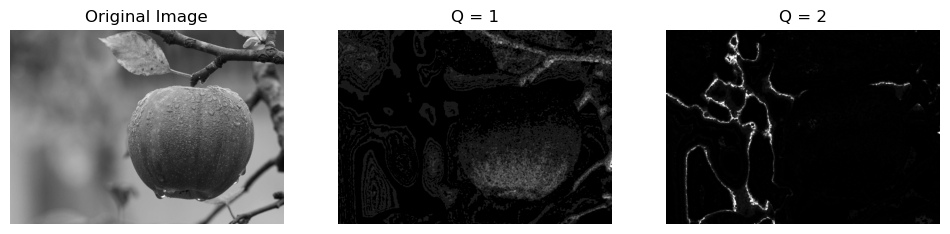

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def contraharmonic_mean_filter(image, kernel_size, Q):
    padded_image = cv2.copyMakeBorder(image, kernel_size // 2, kernel_size // 2, kernel_size // 2, kernel_size // 2, cv2.BORDER_REPLICATE)
    result_image = np.zeros_like(image, dtype=np.float32)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_image[i:i+kernel_size, j:j+kernel_size]
            region_abs = np.abs(region)

            numerator = np.sum(np.power(region_abs, Q + 1))
            denominator = np.sum(np.power(region_abs, Q))

            # Avoid division by zero
            if denominator != 0:
                result_image[i, j] = numerator / denominator
            else:
                result_image[i, j] = 0  # Replace NaN with 0

    return result_image.astype(np.uint8)

img = cv2.imread('photo1.PNG', 0)  

Q_values = [1 , 2 ]

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')


for i, Q in enumerate(Q_values, 2):
    filtered_img = contraharmonic_mean_filter(img, kernel_size=3, Q=Q)

    plt.subplot(1, 3, i)
    plt.title(f'Q = {Q}')
    plt.imshow(filtered_img, cmap='gray')
    plt.axis('off')

plt.show()
